## Importing libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr
import numpy as np
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter('ignore')
from lifelines import KaplanMeierFitter
import scipy.stats

## Reading csv files

In [65]:
df = pd.read_csv('../summary_data/Supplementary_file_1.csv')
wxs = df.loc[df['Data Type'] == 'WXS']
wgs = df.loc[df['Data Type'] == 'WGS']

data = wxs.merge(wgs, left_on='Sample ID', right_on='Sample ID', suffixes=('.wxs', '.wgs'))
data = data.loc[data['Tumor MTDNA Copy Number.wxs'] > 0.0002]

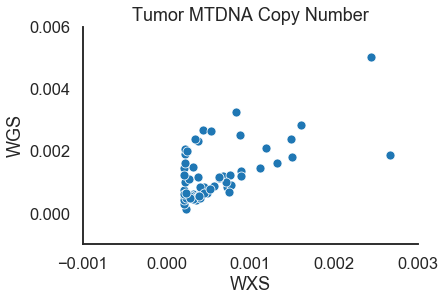

In [66]:
g=sns.set_style("white")
g=sns.set_context("talk")

g = sns.scatterplot(x="Tumor MTDNA Copy Number.wxs", y="Tumor MTDNA Copy Number.wgs", data=data)


import matplotlib.ticker as tkr


    
sns.set_style("white")
sns.set_context("talk")
sns.despine()

g.set(xlabel='WXS', ylabel='WGS', title='Tumor MTDNA Copy Number')


# control x and y limits
plt.ylim(-0.001, 0.006)
plt.xlim(-0.001, 0.003)

plt.savefig("../figures/wgs_wxs_correlation.png", bbox_inches="tight")


In [67]:
np.corrcoef(data["Tumor MTDNA Copy Number.wxs"],data["Tumor MTDNA Copy Number.wgs"])

array([[1.        , 0.57730681],
       [0.57730681, 1.        ]])

In [68]:
scipy.stats.pearsonr(data["Tumor MTDNA Copy Number.wxs"],data["Tumor MTDNA Copy Number.wgs"])

(0.5773068136160769, 1.112447119133568e-06)

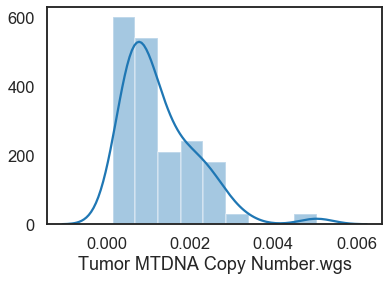

In [70]:
sns.distplot(data["Tumor MTDNA Copy Number.wgs"])


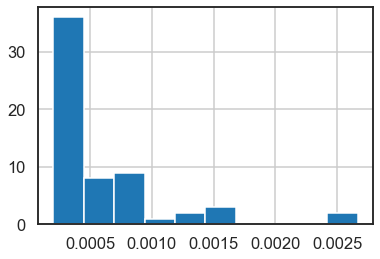

In [72]:
data["Tumor MTDNA Copy Number.wxs"].hist()